pattern prob 10.53125877443529 %
pattern total prob 5.869386323471879 %
370635


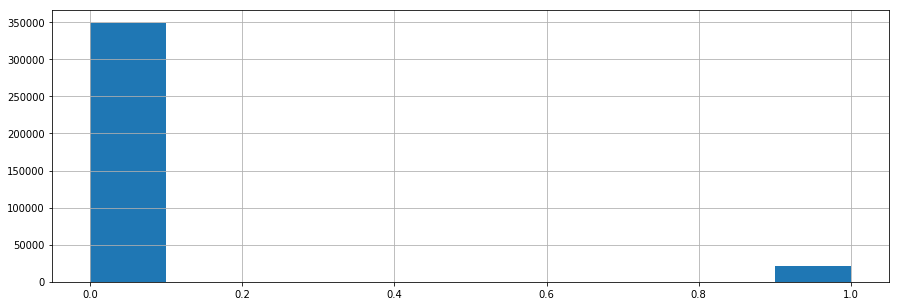

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

%load_ext autoreload
%autoreload 2
%run '../main.py'

dataSetOps = DataSetOps()

mul = 10000

dataSetOps.import_years(2017, 2017)
dataSetOps.df['max'] = dataSetOps.df['max'] * mul
dataSetOps.df['min'] = dataSetOps.df['min'] * mul
dataSetOps.df['open'] = dataSetOps.df['open'] * mul
dataSetOps.df['price'] = dataSetOps.df['price'] * mul

dataSetOps.prepare()


df = dataSetOps.df

# print(df)
# variables
mavglar = [30, 50, 70]
window = 15
spread = 1.5
epilson = spread * mul / 10000

########

df['value'] = True
for mavgl in mavglar:
    mavgl = str(mavgl)
    df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window).rolling(window=50).mean()
    df['value'] = df['value'] & (df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson)
    #df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()
    
    
df['f_price'] = df['price'].shift(-window).rolling(window=window).max()
df['value_real'] = df['f_price'] - df['price'] > epilson

#####

df['value'].astype(int).hist()
print('pattern prob', (len(df[df['value']]) / (len(df[df['value_real']]))) * 100, '%')
print('pattern total prob', (len(df[df['value']]) / (len(df))) * 100, '%')
print(len(df))

####

dfra = df[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100', 'mavg1000']]
dfval = df['value']

In [2]:
%run '../main.py'

In [3]:
lib1 = StandartClassifier()
lib1.init(dfra, dfval, 20, 7)
lib1.run()

Using TensorFlow backend.
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=16, kernel_initializer="uniform")`
  class1 = Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = len(self.X.columns))
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  class2 = Dense(output_dim = 16, init = 'uniform', activation = 'relu')
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  class3 = Dense(output_dim = 16, init = 'uniform', activation = 'relu')
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(a

Epoch 1/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0553 - mean_absolute_error: 0.1121 - acc: 0.9410
Epoch 2/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0467 - mean_absolute_error: 0.0933 - acc: 0.9428
Epoch 3/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0401 - mean_absolute_error: 0.0816 - acc: 0.9491
Epoch 4/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0348 - mean_absolute_error: 0.0706 - acc: 0.9547
Epoch 5/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0332 - mean_absolute_error: 0.0671 - acc: 0.9561
Epoch 6/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0323 - mean_absolute_error: 0.0649 - acc: 0.9572
Epoch 7/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.0320 - mean_absolute_error: 0.0639 - acc: 0.9574
classifier saved to  /tmp/mavg_classifier_958006


begin analysing
confusion_matrix: [[34904    83]
 [ 1649   428]]
class_accuracy => accuracy:  0.6018470661342966 risk:  0.162426614481409
optimistic_accuracy => risk:  0.05 min pass point:  0.8533698
AxesSubplot(0.125,0.125;0.775x0.755)


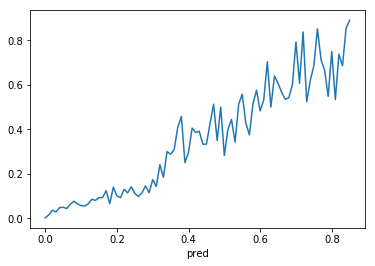

In [16]:
class StandartAnalyser:
    def init(self, classifier):
        self.classifier = classifier
    
    def analyse(self, X, y_test, name):
        print('begin analysing')
        # Creating the Confusion Matrix
        from sklearn.metrics import confusion_matrix
        from lib.helper import AccuracyCalculator
        y_pred = self.classifier.predict(X)
        cm = confusion_matrix(y_test, (y_pred > 0.8))
        print('confusion_matrix:', cm)
        
        %matplotlib inline 
        
        AccuracyCalculator.class_accuracy(cm)
        AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
        risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)
        
        print((1-risk_hist_df.risk).plot())
        #### 

#         dfx = df[df['value']]
#         p_f = len(dfx[dfx['value_real']]) / len(dfx)
#         p_r = cm[1,1] / (cm[1,1] + cm[0,1])
#         print('real prob', p_f , p_r, p_f * p_r)
        
    def analyse2(self):

        ###

        y_all_pred = self.predict(self.X)
        y_f_price_real = df['value_real']
        cm = confusion_matrix(y_f_price_real, (y_all_pred > 0.8))

        AccuracyCalculator.class_accuracy(cm)
        AccuracyCalculator.optimistic_accuracy(y_all_pred[:,0], y_f_price_real, 100)
        risk_hist_df = AccuracyCalculator.risk_hist(y_all_pred[:,0], y_f_price_real)

        print(cm)

        print((1-risk_hist_df.risk).plot())

        ####

        dfr = df[df['value']]
        print(dfr['value_real'].astype(int).hist())
        print(len(dfr[dfr['value_real']]) / (len(dfr)))
        print(len(dfr['value_real']))
        
analyser1 = StandartAnalyser()
analyser1.init(lib1)
analyser1.analyse(lib1.X_test, lib1.y_test, 'a1')

In [15]:
lib1.predict(lib1.X_test)

array([[0.0025452 ],
       [0.0008906 ],
       [0.02112046],
       ...,
       [0.21862026],
       [0.00039833],
       [0.0005772 ]], dtype=float32)